In [1]:
import torch
from torch.distributions.normal import Normal

In [2]:
from scipy.stats import norm

In [11]:
x = norm.cdf(5, scale=2)
y = norm.cdf(6, loc=1, scale=2)
print(x, y)

0.9937903346742238 0.9937903346742238


In [1]:
from utils import GaussDiscreter
import torch

In [2]:
discreater = GaussDiscreter(5, 105, 2, 1)
labels = [43.2, 24.3]
dis_labels = discreater.contin2dis(labels)
print(type(dis_labels))
print(dis_labels.dtype)

<class 'numpy.ndarray'>
float32


In [4]:
revert_labels = discreater.dis2contin(dis_labels)
print(type(revert_labels))

dis_labels_torch = torch.tensor(dis_labels)
revert_labels_torch = discreater.dis2contin(dis_labels_torch)
print(type(revert_labels_torch))
print(revert_labels_torch)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
tensor([43.2027, 24.2963])


In [1]:
import matplotlib.pyplot as plt
import torch

from einops import rearrange
from dataset.brain import *
from monai.transforms import Compose, ToTensor, Resize

In [2]:
transform = Compose([
    ToTensor(),
])
dataset = BrainSet(transform=transform)
sample = dataset[0]
print(sample['data'].shape)

torch.Size([1, 121, 145, 121])


In [6]:
patch_size = (10, 10, 10)
img_size = (100, 100, 100)
img = sample['data']

patch_img = rearrange(img, 'c (d p1) (h p2) (w p3) -> (d h w) (c p1 p2 p3)', p1=patch_size[0], p2=patch_size[1], p3=patch_size[2])
print(patch_img.shape)

torch.Size([1000, 1000])


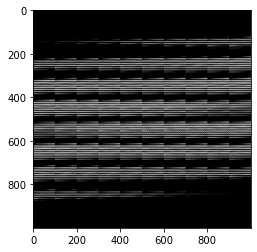

In [9]:
patch_img = (patch_img - patch_img.min()) / patch_img.max()
plt.imshow(patch_img.numpy(), cmap='gray')